<h1> Question 1<h1>

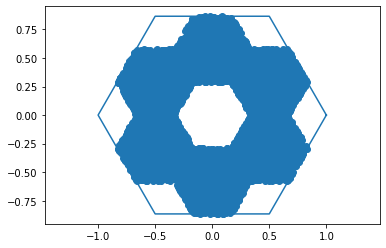

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon

#Number of iterations
N = 10000

#Number of side of the polygon (hexagon: N_gon=6)
N_gon = 6
#Verticies of hexagon (or polygon if N_gon is not 6)
hexagon_points = [Point(np.cos(n*2*np.pi/N_gon),np.sin(n*2*np.pi/N_gon)) for n in range(N_gon)]
#Hexagon (polygon)
hexagon = Polygon(hexagon_points)

#Plot polygon
fig, ax = plt.subplots(1, 1);
x,y = hexagon.exterior.xy
plt.plot(x,y);
ax.axis('equal');

#Array to store centroid of the triangle formed by a randomly selected point in the interior of the polygon
#and a random side of the polygon
p = []
for k in range(N):
    #Randomly chosen point inside the polygon
    r_point = Point(np.random.uniform(-1,1,1),np.sin(np.pi/3)*np.random.uniform(-1,1,1))
    while hexagon.contains(r_point)==False:
        r_point = Point(np.random.uniform(-1,1,1),np.sin(np.pi/3)*np.random.uniform(-1,1,1))
    #Plot the random point
    #plt.scatter(r_point.x,r_point.y,color='red')
    
    #Randomly chosen vertex of the polygon
    rand_vert = np.random.randint(0, N_gon)
    #Triangle formed by random point r_point and a random side of the polygon
    triangle = Polygon([r_point, hexagon_points[rand_vert], hexagon_points[(rand_vert+np.random.randint(0, 2)*2-1)% N_gon]])
    #Plot triangle
    #x,y = triangle.exterior.xy
    #plt.plot(x,y);
    
    #Append p with the centroid of triangle
    p.append(triangle.centroid)
    #plot centroid p[k]
    #plt.scatter(p[k].x,p[k].y);
    
xs = [point.x for point in p]
ys = [point.y for point in p]
plt.scatter(xs, ys);

Six regular hexagons of equal size emerge, packed inside the "parent" hexagon. This also occurs for other regular polygons. For example, if "N_gon" is 3, three triangles emerge. 

<h1> Question 2 <h1>

In [2]:
import tarfile
import pandas as pd
from functools import reduce 

data_akas=pd.read_csv('title.akas.tsv\data.tsv',sep='\t')
data_akas.drop_duplicates()

data_basics=pd.read_csv('title.basics.tsv\data.tsv',sep='\t')
data_basics.drop_duplicates()

data_ratings=pd.read_csv('title.ratings.tsv\data.tsv',sep='\t')
data_ratings.drop_duplicates()



#Merge ratings and basics:
#Outer join
data_merged1 = pd.merge(data_ratings, data_basics, how = "outer")

#Inner join
data_merged2 = pd.merge(data_ratings, data_basics, how = "inner")

print('After first merger:')
print('Total number of unique tconst vlaues = ',len(data_basics.index)+len(data_ratings.index)-len(data_merged2.index))
print('Number of rows in outer merged dataframe = ',len(data_merged1.index))

#Merge akas with previously merged dataframe
#Outer join
data_merged1 = pd.merge(data_akas, data_merged1, left_on = ['titleId'],right_on=['tconst'], how = "outer")

#Inner join
data_merged2 = pd.merge(data_akas, data_merged2, left_on = ['titleId'],right_on=['tconst'], how = "inner")

print('After final merger:')
print('Number of rows in outer merged dataframe = ',len(data_merged1.index))
print('Number of rows in inner merged dataframe = ',len(data_merged2.index))

print(data_merged1.titleType.unique())
print('Number of unique titles is ', len(data_merged1.titleType.unique())-1)

C:\Users\Amy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Amy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


After first merger:
Total number of unique tconst vlaues =  5330276
Number of rows in outer merged dataframe =  5330276
After final merger:
Number of rows in outer merged dataframe =  6740089
Number of rows in inner merged dataframe =  1686547
['short' 'movie' nan 'tvMovie' 'tvSeries' 'tvEpisode' 'tvShort'
 'tvMiniSeries' 'tvSpecial' 'video' 'videoGame']
Number of unique titles is  10


In [8]:
df_new = data_merged1[((data_merged1.language == 'en') | (data_merged1.region == 'US')) 
                      & (data_merged1.titleType == 'movie')]

df_new = df_new.assign(log10Votes=lambda x: np.log10(x.numVotes))


df_new['genres'] = df_new['genres'].str.lower()

df_new.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,log10Votes
51,tt0000009,3.0,Miss Jerry,US,\N,\N,\N,0,tt0000009,5.5,70.0,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,romance,1.845098
576,tt0000147,1.0,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0,tt0000147,5.2,266.0,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897,\N,20,"documentary,news,sport",2.424882
1840,tt0000630,4.0,Hamlet,US,\N,\N,\N,0,tt0000630,3.1,10.0,movie,Hamlet,Amleto,0.0,1908,\N,\N,drama,1.000000
1950,tt0000679,1.0,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,tt0000679,5.9,26.0,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0.0,1908,\N,120,"adventure,fantasy",1.414973
2264,tt0000838,4.0,The Cultivation of the Cacao Tree,XWW,en,\N,literal English title,0,tt0000838,NaN,NaN,movie,A Cultura do Cacau,A Cultura do Cacau,0.0,1909,\N,\N,\n,NaN
